# Lexical graphs

## stop words - Salton (1971)
### http://www.lextek.com/manuals/onix/stopwords2.html

In [1]:
data=open('stopwords.txt','r')
data_read = data.read()
stop_words=data_read.replace('\n',' ').split()

## GLOVE vectors
### https://nlp.stanford.edu/projects/glove/

In [2]:
import numpy as np

vectors = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    vectors[word] = coefs
f.close()


In [3]:
import random
from nltk import sent_tokenize
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def glove_text(text):
    text=list(set([w.lower() for w in tokenizer.tokenize(text)]))
    text=[w for w in text if w not in stop_words]
    glove_vectors={}
    for w in text:
        if w not in vectors.keys():
            vector=[1]*300
            vector=[x*random.uniform(-1.5,1.5) for x in vector]
            vector=np.array(vector)
            glove_vectors[w]=vector
        else:
            glove_vectors[w]=vectors[w]
    return glove_vectors


## Distancias entre palabras y oraciones

In [4]:
def simglove(vector_i,vector_j):
    return 1-spatial.distance.cosine(vector_i.reshape(1,-1),vector_j.reshape(1,-1))

In [5]:
import itertools
from scipy import spatial

def sent_distance(text,index_sent_i,index_sent_j,threshold): 
    glove_vectors=glove_text(text)
    sentences=sent_tokenize(text)
    sent_i=list(set([w.lower() for w in tokenizer.tokenize(sentences[index_sent_i])]))
    sent_i=[w for w in sent_i if w not in stop_words]
    sent_j=list(set([w.lower() for w in tokenizer.tokenize(sentences[index_sent_j]) if w not in stop_words]))
    sent_j=[w for w in sent_j if w not in stop_words]

    p=list(itertools.product(sent_i,sent_j))
    d=[]
    for item in p:
        d+=[simglove(glove_vectors[item[0]],glove_vectors[item[1]])]
    if len(d)==0:
        return -1
    else:
        if max(d)>=threshold:
            return max(d)
        else:
            return -1
        
##########################################################################################################################
#
#import spacy
#nlp = spacy.load('en')
#
#def compound(sentence):
#    doc=nlp(sentence)
#    index=-1
#    for i in range(len(doc)-1):
#        if doc[i].pos_=='PROPN' and doc[i+1].pos_:
#            index=i
#            break
#
#    if index==-1:
#        return sentence
#    else:
#        sentence=[token.text for token in doc]
#        s=[]
#        for i in range(len(doc)):
#            if i==index:
#                compound=sentence[i]+'-'+sentence[i+1]
#        for i in [j for j in range(len(doc)) if j!=index+1]:
#            if i!=index:
#                s+=[sentence[i]]
#            else:
#                s+=[compound]
#                
#    return ' '.join(s)
#
#def sent_distance_pos(text,index_sent_i,index_sent_j,threshold): 
#    glove_vectors=glove_text(text)
#    sentences=sent_tokenize(text)
#    sentences=[' '.join([token.text for token in nlp(s) if token.pos_=='PROPN' or token.pos_=='NOUN' or token.pos_=='ADJ']) for s in sentences]
#    sent_i=list(set([w.lower() for w in tokenizer.tokenize(sentences[index_sent_i])]))
#    sent_i=[w for w in sent_i if w not in stop_words]
#    sent_j=list(set([w.lower() for w in tokenizer.tokenize(sentences[index_sent_j]) if w not in stop_words]))
#    sent_j=[w for w in sent_j if w not in stop_words]
#
#    p=list(itertools.product(sent_i,sent_j))
#    d=[]
#    for item in p:
#        d+=[simglove(glove_vectors[item[0]],glove_vectors[item[1]])]
#    if len(d)==0:
#        return -1
#    else:
#        if max(d)>=threshold:
#            return max(d)
#        else:
#            return -1
#########################################################################################################################    


## Lexical graph
### http://aclweb.org/anthology/N16-1167
### http://aclweb.org/anthology/W17-4803

In [6]:
import networkx as nx

def lexical_graph(text):
    sentences=sent_tokenize(text)
    G=nx.DiGraph()
    for i in range(len(sentences)):
        G.add_node(i)
    pairs=list(itertools.combinations(range(len(sentences)),2)) ## solo aristas dirigidas en el sentido del texto!
    for pair in pairs:
        dist=sent_distance(text,pair[0],pair[1],0.85)
        if dist!=-1:
            G.add_edge(pair[0],pair[1],weight=round(dist,4))
    return G

## Introducciones revista CELL

In [7]:
import ast
import re

data = open('corpus_cell.json','r')
data_cell=data.read()
data_cell = ast.literal_eval(data_cell)
introductions=[' '.join(item['introduction']) for item in data_cell]
introductions=[re.sub("[\(\[].*?[\)\]]", "", item) for item in introductions]
introductions=[x for x in introductions if len(x)>0]
introductions=[' '.join([s for s in sent_tokenize(text) if len(s)>1]) for text in introductions]

In [8]:
text=introductions[0]
G=lexical_graph(text)
G.edges(data=True)

OutEdgeDataView([(0, 1, {'weight': 1.0}), (0, 2, {'weight': 1.0}), (0, 3, {'weight': 1.0}), (0, 9, {'weight': 1.0}), (0, 13, {'weight': 1.0}), (0, 15, {'weight': 1.0}), (0, 16, {'weight': 1.0}), (0, 17, {'weight': 1.0}), (0, 18, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (1, 9, {'weight': 1.0}), (1, 13, {'weight': 1.0}), (1, 15, {'weight': 1.0}), (1, 16, {'weight': 1.0}), (1, 17, {'weight': 1.0}), (1, 18, {'weight': 1.0}), (2, 4, {'weight': 1.0}), (2, 5, {'weight': 1.0}), (2, 9, {'weight': 1.0}), (2, 13, {'weight': 1.0}), (2, 14, {'weight': 1.0}), (2, 15, {'weight': 1.0}), (2, 16, {'weight': 1.0}), (2, 17, {'weight': 1.0}), (2, 18, {'weight': 1.0}), (3, 4, {'weight': 1.0}), (3, 5, {'weight': 1.0}), (4, 5, {'weight': 1.0}), (4, 14, {'weight': 1.0}), (5, 7, {'weight': 1.0}), (5, 9, {'weight': 1.0}), (5, 10, {'weight': 1.0}), (5, 11, {'weight': 1.0}), (5, 12, {'weight': 1.0}), (5, 13, {'weight': 1.0}), (5, 14, {'weight': 1.0}), (5, 17, {'weight': 1.0}), (6, 7, {'weight': 1.0}), (6, 8, {'w

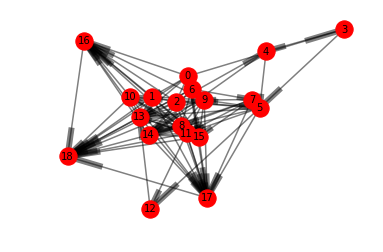

In [9]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
labels={i:i for i in G.nodes}
nx.draw_networkx_nodes(G, pos, G.nodes, node_size = 300)
nx.draw_networkx_edges(G, pos, alpha=0.5,width=1.5)
nx.draw_networkx_labels(G,pos,labels,font_size=10)
plt.axis('off')
plt.show()

In [10]:
sentences=sent_tokenize(text)
sentences[0],sentences[-1]=sentences[-1],sentences[0]

In [11]:
text=' '.join(sentences)
G=lexical_graph(text)
G.edges(data=True)

OutEdgeDataView([(0, 1, {'weight': 1.0}), (0, 2, {'weight': 1.0}), (0, 6, {'weight': 1.0}), (0, 9, {'weight': 1.0}), (0, 10, {'weight': 1.0}), (0, 11, {'weight': 1.0}), (0, 13, {'weight': 1.0}), (0, 14, {'weight': 1.0}), (0, 15, {'weight': 1.0}), (0, 16, {'weight': 1.0}), (0, 17, {'weight': 1.0}), (0, 18, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (1, 9, {'weight': 1.0}), (1, 13, {'weight': 1.0}), (1, 15, {'weight': 1.0}), (1, 16, {'weight': 1.0}), (1, 17, {'weight': 1.0}), (1, 18, {'weight': 1.0}), (2, 4, {'weight': 1.0}), (2, 5, {'weight': 1.0}), (2, 9, {'weight': 1.0}), (2, 13, {'weight': 1.0}), (2, 14, {'weight': 1.0}), (2, 15, {'weight': 1.0}), (2, 16, {'weight': 1.0}), (2, 17, {'weight': 1.0}), (2, 18, {'weight': 1.0}), (3, 4, {'weight': 1.0}), (3, 5, {'weight': 1.0}), (3, 18, {'weight': 1.0}), (4, 5, {'weight': 1.0}), (4, 14, {'weight': 1.0}), (5, 7, {'weight': 1.0}), (5, 9, {'weight': 1.0}), (5, 10, {'weight': 1.0}), (5, 11, {'weight': 1.0}), (5, 12, {'weight': 1.0}), (5, 13, {

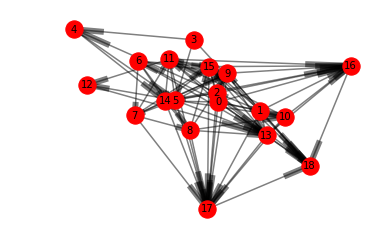

In [12]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
labels={i:i for i in G.nodes}
nx.draw_networkx_nodes(G, pos, G.nodes, node_size = 300)
nx.draw_networkx_edges(G, pos, alpha=0.5,width=1.5)
nx.draw_networkx_labels(G,pos,labels,font_size=10)
plt.axis('off')
plt.show()

In [13]:
text='The hotel is famous. It is one of the most well-known hotels in the country. The latest international dancing competition was held at the hotel. The hotel spent a lot of money to advertise the event. Because the hotel wanted to gain international reputation. But not many people attended the event.'
G=lexical_graph(text)

In [14]:
nx.is_connected(G.to_undirected())

False

In [15]:
text='The hotel, which is one of the most well-known hotels in this region, wanted to promote its image around the world by hosting the latest international dancing competition. Although the event was widely advertised, not many people participated in the competition.'
G=lexical_graph(text)
nx.is_connected(G.to_undirected())

True

## Corpus de errores
### Cambiamos un porcentaje P de palabras de cada texto x palabras a una distancia D
### buscamos primero las palabras que establecen relaciones de cohesion en un texto

In [16]:
threshold=0.85

def sent_words(text,index_sent_i,index_sent_j,threshold): 
    glove_vectors=glove_text(text)
    sentences=sent_tokenize(text)
    sent_i=list(set([w.lower() for w in tokenizer.tokenize(sentences[index_sent_i])]))
    sent_i=[w for w in sent_i if w not in stop_words]
    sent_j=list(set([w.lower() for w in tokenizer.tokenize(sentences[index_sent_j])]))
    sent_j=[w for w in sent_j if w not in stop_words]

    p=list(itertools.product(sent_i,sent_j))
    d=[]
    for item in p:
        if simglove(glove_vectors[item[0]],glove_vectors[item[1]])>=threshold:
            d+=[[item[0],item[1]]]
    
    return d

def lexical_words(text): ## pares de palabras q estan involucradas en relaciones de cohesion lexica
    words=[]
    sentences=sent_tokenize(text)
    pairs=list(itertools.combinations(range(len(sentences)),2)) 
    for pair in pairs:
        words+=sent_words(text,pair[0],pair[1],0.85)
        
    return words

from collections import Counter

def lexical_words_flat(text): ## palabra que participa en el mayor numero de relaciones de cohesion lexica
    return Counter([item for sublist in lexical_words(text) for item in sublist]).most_common()[0][0]


In [17]:
text=introductions[0]

In [18]:
sent_words(text,0,1,threshold)

[['virus', 'virus'], ['zika', 'zika']]

In [19]:
lexical_words(text)

[['virus', 'virus'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['emerging', 'emerging'],
 ['virus', 'virus'],
 ['outbreak', 'outbreak'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['infections', 'infections'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['diagnostics', 'diagnostics'],
 ['diagnostics', 'diagnostics'],
 ['development', 'development'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['development', 'development'],
 ['virus', 'virus'],
 ['diagnostics', 'diagnostics'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['zika', 'zika'],
 ['increase', 'increase'],
 ['zika', 'zika'],
 ['virus', 'virus'],
 ['synthetic', 'synthetic'],
 ['synthetic', 'synthetic'],
 ['biolo

In [20]:
lexical_words_flat(text)

'zika'

## visualizacion de la palabra 'zika'

In [22]:
from nltk import word_tokenize
from termcolor import colored
colors = ['blue', 'red', 'green', 'magenta','grey']

text=introductions[0]
word=lexical_words_flat(text)

text=[w.lower() for w in word_tokenize(text)]

c=[]
for w in text:
    if w==word:
        c+=[colored(w, colors[1],'on_cyan',attrs=['bold'])] 
    else:
        c+=[w] 
print(' '.join(c))

the emerging outbreak of zika virus in the americas has brought this once obscure pathogen to the forefront of global healthcare . mostly transmitted by aedes aegypti and a. albopictus mosquitoes , zika virus infections have been further spread by international travel and have expanded to large , heavily populated regions of south , central , and north america . correlations between the increase in zika virus infections , the development of fetal microcephaly , and guillain-barré syndrome have resulted in the declaration of a public health emergency by the world health organization and a call for fast-tracked development of zika virus diagnostics . synthetic biology is an emerging discipline that has great potential to respond to such pandemics . the increasing ability of synthetic biologists to repurpose and engineer natural biological components for practical applications has led to new opportunities for molecular diagnostics . we previously developed two biotechnologies that dramati

## funcion que entrega un texto con cambios aleatorios en la palabra mas involucrada en la cohesion lexica

In [23]:
import random
from nltk import word_tokenize
import operator

def cohesion_perturbation(text,percentage,distance):
    cohesive_word=lexical_words_flat(text)
    glove_vectors=glove_text(text)
    text=[w.lower() for w in word_tokenize(text)]
    text_final=[]
    for w in text:
        if w in stop_words:
            text_final+=[w]
        else:
            if w==cohesive_word:
                r=random.random()
                if r<percentage:
                    try:
                        min_word={word:spatial.distance.cosine(glove_vectors[w],glove_vectors[word]) for word in glove_vectors.keys()}
                        d=random.randint(0,distance)
                        min_word=list(zip(*sorted(min_word.items(), key=operator.itemgetter(1))))[0][d]
                        w=min_word
                        text_final+=[w]
                    except KeyError:
                        text_final+=[w]
                else:
                    text_final+=[w]
            else:
                text_final+=[w]
    return ' '.join(text_final)            
    

In [26]:
text=introductions[0]

In [27]:
text_changed=cohesion_perturbation(text,0.25,10)

In [28]:
lexical_words_flat(text_changed)


'virus'

In [29]:
G=lexical_graph(text)
G_cohesive=lexical_graph(text_changed)

In [30]:
def coherence(G): 
    D=dict(G.out_degree(weight='weight'))
    return sum(D.values())/float(len(D.values()))


print(coherence(G),coherence(G_cohesive))


4.67688947368421 4.571626315789474


## corpus preliminar de textos cambiados de CELL


In [125]:
introductions=introductions[:1000]
introduction_changed=[cohesion_perturbation(text,0.25,10) for text in introductions]

In [246]:
accuracy=[1 if coherence(lexical_graph(introductions[i]))>coherence(lexical_graph(introduction_changed[i])) else 0 for i in range(len(introductions))]
print(sum(accuracy)/float(len(accuracy)))

data=[]
for i in range(len(accuracy)):
    if accuracy[i]==1:
        data+=[[introductions[i],introduction_changed[i]]]

print(len(data))

KeyError: 'kb'

In [127]:
X_original=list(zip(*data))[0]
X_artificial=list(zip(*data))[1]

In [128]:
len(X_original),len(X_artificial)

(733, 733)

## experimento de clasificacion de a pares

### extraemos rasgos!

In [129]:
import community

### funcion que extrae los rasgos de un texto y los devuelve como diccionario
def coherence2(G): 
    D=dict(G.degree(weight='weight'))
    return sum(D.values())/float(len(D.values()))

def eigen_centrality(G): 
    D=dict(nx.eigenvector_centrality_numpy(G.to_undirected(), weight='weight'))
    return sum(D.values())/float(len(D.values()))

def rank(G): 
    D=dict(nx.pagerank_numpy(G, alpha=0.85, weight='weight'))
    return sum(D.values())/float(len(D.values()))

def vitality(G): 
    D=dict(nx.closeness_vitality(G, weight='weight'))
    return sum(D.values())/float(len(D.values()))

def feature_dictionary(text):
    d={}
    G=lexical_graph(text)
    gg=0
    for g in nx.connected_component_subgraphs(G.to_undirected()):
        gg+=nx.average_shortest_path_length(g)
    gg=gg/float(nx.number_connected_components(G.to_undirected()))
    d['path']=gg
    #d['out_degree']=coherence(G)
    d['degree']=coherence2(G)
    d['clustering']=nx.average_clustering(G.to_undirected(), weight='weight')
    d['number_connected']=nx.number_connected_components(G.to_undirected())
    d['weakly_connected']=nx.is_weakly_connected(G)
    d['number_weakly_connected_components']=nx.number_weakly_connected_components(G)
    d['semi_connected']=nx.is_semiconnected(G)
    partition=community.best_partition(G.to_undirected())
    d['number_communities']=len(list(set(partition.values())))
    #d['number_strongly_connected_components']=nx.number_strongly_connected_components(G)
    #d['is_strongly_connected']=nx.is_strongly_connected(G)
    d['is_connected']=nx.is_connected(G.to_undirected())
    #d['number_attracting_components']=nx.number_attracting_components(G)
    L=[len(G.nodes) for G in list(nx.connected_component_subgraphs(G.to_undirected()))]
    d['max_component']=max(L)/float(sum(L))
    
    return d

from sklearn.feature_extraction import DictVectorizer

def transform(TEXT):
    vec = DictVectorizer()

    measurements=[]
    for text in TEXT:
        measurements+=[feature_dictionary(text)]
    
    return vec.fit_transform(measurements)

### normalizamos los valores de las features

In [130]:
features=transform(X_original+X_artificial)

In [131]:
from sklearn.preprocessing import StandardScaler

features_normalized = StandardScaler().fit_transform(features.toarray())

In [132]:
features_normalized[0]

array([-0.68559818, -0.95034061,  0.30929787,  0.29399614,  0.32602577,
       -0.30037596, -0.30037596,  0.54380882, -0.20296104,  0.30929787])

### ahora juntamos los pares de datos

In [133]:
import random

n=len(X_original)
features_original=features_normalized[:n]
features_artificial=features_normalized[n:]

X=[]
labels=[]
for i in range(len(X_original)):
    if random.random()<0.5:
        X+=[features_original[i]-features_artificial[i]]
        labels+=[1]
    else:
        X+=[features_artificial[i]-features_original[i]]
        labels+=[-1]
        

### usamos svm para clasificar a ver como nos va


In [134]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

svm = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(svm, X, labels, cv=3,scoring='f1_macro',n_jobs=-1)
print("f1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svm, X, labels, cv=3,scoring='precision_macro',n_jobs=-1)
print("precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svm, X, labels, cv=3,scoring='recall_macro',n_jobs=-1)
print("recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

f1: 0.99 (+/- 0.01)
precision: 0.99 (+/- 0.01)
recall: 0.99 (+/- 0.01)


## Cadenas lexicas

In [162]:
text=introductions[0]

In [171]:
def lexical_words_graph(text): ## pares de palabras q estan involucradas en relaciones de cohesion lexica
    words=[]
    pair_sentences=[]
    sentences=sent_tokenize(text)
    pairs=list(itertools.combinations(range(len(sentences)),2)) 
    for pair in pairs:
        words+=[sent_words(text,pair[0],pair[1],0.85)]
        pair_sentences+=[pair]
    
    flat_words=list(set([item for sublist in words for item in sublist]))
    
    return words#,pair_sentences

In [173]:
sent_words(text,0,1,0.85)
#list(zip(*lexical_words_graph(text)))

[['virus', 'virus'], ['zika', 'zika']]

In [183]:
def lexical_words_graph(text):
    words={}
    sentences=sent_tokenize(text)
    pairs=list(itertools.combinations(range(len(sentences)),2)) 
    for pair in pairs:
        words[pair[0]]={}
    for pair in pairs:
        r=sent_words(text,pair[0],pair[1],0.85)
        if len(r)>0:
            words[pair[0]][pair[1]]=sent_words(text,pair[0],pair[1],0.85)
    
    return words

In [186]:
lexical_words_graph(text)[0]

{1: [['virus', 'virus'], ['zika', 'zika']],
 2: [['virus', 'virus'], ['zika', 'zika']],
 3: [['emerging', 'emerging']],
 9: [['outbreak', 'outbreak'], ['virus', 'virus'], ['zika', 'zika']],
 13: [['virus', 'virus'], ['zika', 'zika']],
 15: [['zika', 'zika']],
 16: [['virus', 'virus']],
 17: [['zika', 'zika']],
 18: [['virus', 'virus'], ['zika', 'zika']]}

In [ ]:
def chain_words_graph(text):
    chain={}
    
    return chain